In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module
from sys import path as sysPath
sysPath.append('../../src')

from interfacePy.Axion import Axion 
from interfacePy.AxionMass import AxionMass

from interfacePy.Cosmo import Cosmo
from interfacePy.FT import FT #easy tick formatting


In [3]:
theta_i, fa=0.94435, 1e12
# theta_i, fa=np.pi, 1e12
# theta_i, fa=1e-3, 1e5

umax=500
TSTOP=1e-4
ratio_ini=1e3

N_convergence_max, convergence_lim=5, 1e-2 #this is fine, but you can experiment a bit. 

#radiation dominated example
inputFile="../InputExamples/RDinput.dat" 

# Matter domination example. 
# the NSC parameters (using the notation of 2012.07202) are:
# T_end=1e-2 (GeV), c=3, T_ini=1e12 (GeV), and r=1e-1
# inputFile="../InputExamples/MatterInput.dat" 


# Kination domination example. 
# the NSC parameters (using the notation of 2012.07202) are:
# T_end=0, c=6, T_ini=1e3 (GeV), and r=1e10
# inputFile="../InputExamples/KinationInput.dat" 


In [4]:
#you can define the axion mass using a data file
axionMass = AxionMass(r'../../src/data/chi.dat',0,1e5)

#you can define the axion mass via a function
# def ma2(T,fa):
#     TQCD=150*1e-3;
#     ma20=3.1575e-05/fa/fa;
#     if T<=TQCD:
#         return ma20;
#     return ma20*pow((TQCD/T),8.16)

# axionMass = AxionMass(ma2)


In [5]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
initial_step_size=1e-2; #initial step the solver takes. 
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
maximum_step_size=1e-2; #This limits the sepsize to a lower limit.
absolute_tolerance=1e-8; #absolute tolerance of the RK solver
relative_tolerance=1e-8; #relative tolerance of the RK solver
beta=0.9; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.2; 
fac_min=0.8;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


# Axion instance
ax=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile,axionMass,
        initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
        relative_tolerance, beta, fac_max, fac_min, maximum_No_steps)


In [6]:
# Axion instance
# you can always run Axion with the default parameters for the solver
# ax=Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile)

In [7]:
# solve the EOM (this only gives you the relic, T_osc, theta_osc, and a_osc)
ax.solveAxion()

0.01327204704284668

In [8]:
ax.relic, ax.T_osc, ax.theta_osc

(0.11934764270619788, 0.9785449430619917, 0.897502149332404)

In [9]:
ax.getPeaks()#this gives you the peaks of the oscillation
ax.getPoints()#this gives you all the points of integration
ax.getErrors()#this gives you local errors of integration

<IPython.core.display.Javascript object>


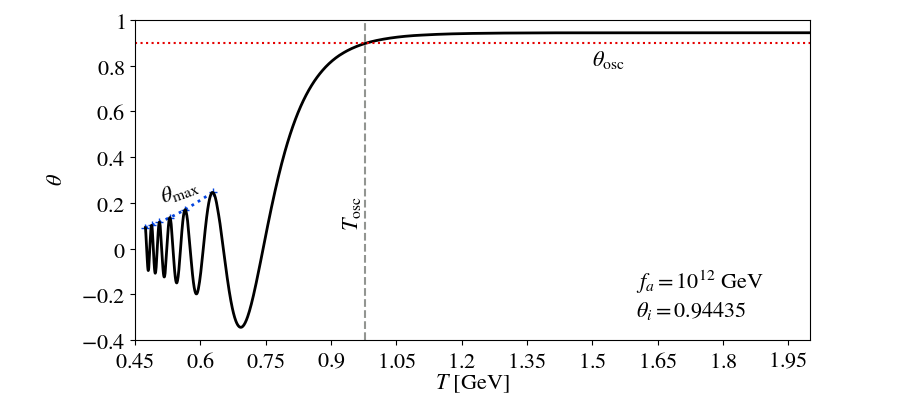

In [10]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    #this plot shows the peaks of the oscillation
    sub.plot(ax.T_peak,ax.theta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)

    #this plot shows all the points
    sub.plot(ax.T,ax.theta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')

    
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    sub.axhline(ax.theta_osc,linestyle=':',color='xkcd:red',linewidth=1.5)
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    
    #set major ticks
    _M_xticks=[ round(0.45+i*0.15,4) for i in range(0,15) ]
    _M_yticks=[ round(-0.4+i*0.1,3) for i in range(0,20,2)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.45,xmax=2,ymin=-0.4,ymax=1,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.92,y=0.1, s=r'$T_{\rm osc}$',rotation=90)
    sub.text(x=1.5,y=0.8, s=r'$\theta_{\rm osc}$')
    
    sub.text(x=0.5,y=0.2, s=r'$\theta_{\rm max}$',rotation=20)
    
    sub.text(x=1.6,y=-0.3,
         s=r'$f_{a}=10^{12}~{\rm GeV}$'+'\n'+ r'$\theta_i = 0.94435$')
    
#     fig.savefig('theta_evolution.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


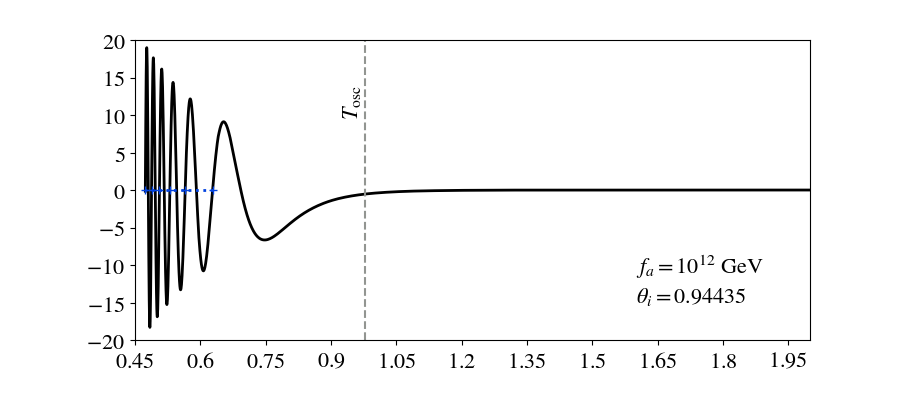

In [11]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.zeta,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax.T_peak,ax.zeta_peak,linestyle=':',marker='+',color='xkcd:blue',linewidth=2)
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)

    
    #set major ticks
    _M_xticks=[ round(0.45+i*0.15,4) for i in range(0,15) ]
    _M_yticks=[ round(-20+i*5,3) for i in range(0,20,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.45,xmax=2,ymin=-20,ymax=20,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.92,y=10, s=r'$T_{\rm osc}$',rotation=90)
    
    
    sub.text(x=1.6,y=-15,
         s=r'$f_{a}=10^{12}~{\rm GeV}$'+'\n'+ r'$\theta_i = 0.94435$')

    
#     fig.savefig('zeta_evolution.pdf',bbox_inches='tight')

    fig.show()

/tmp/ipykernel_38660/1758153319.py:7: RuntimeWarning: invalid value encountered in true_divide
  sub.plot(ax.T,np.abs(ax.dzeta/ax.zeta),linestyle='-',linewidth=2,alpha=1,c='xkcd:red',label=r'$\dfrac{\delta \zeta}{\zeta}$')


<IPython.core.display.Javascript object>


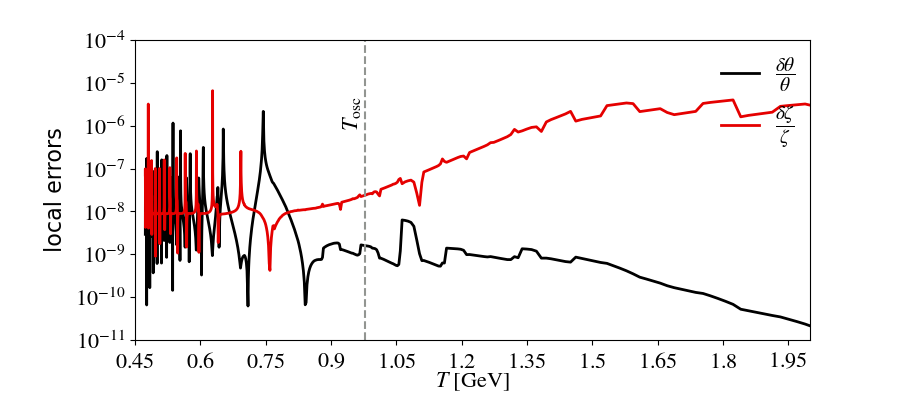

In [12]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,np.abs(ax.dtheta/ax.theta),linestyle='-',linewidth=2,alpha=1,c='xkcd:black',label=r'$\dfrac{\delta \theta}{\theta}$')
    sub.plot(ax.T,np.abs(ax.dzeta/ax.zeta),linestyle='-',linewidth=2,alpha=1,c='xkcd:red',label=r'$\dfrac{\delta \zeta}{\zeta}$')
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'local errors')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    sub.legend(bbox_to_anchor=(0.98, 0.95),borderaxespad=0., 
           borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)

    
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.45+i*0.15,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.45,xmax=2,ymin=1e-11,ymax=1e-4,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.92,y=1e-6, s=r'$T_{\rm osc}$',rotation=90)
    
#     fig.savefig('local_errors.pdf',bbox_inches='tight')

    
    fig.show()


<IPython.core.display.Javascript object>


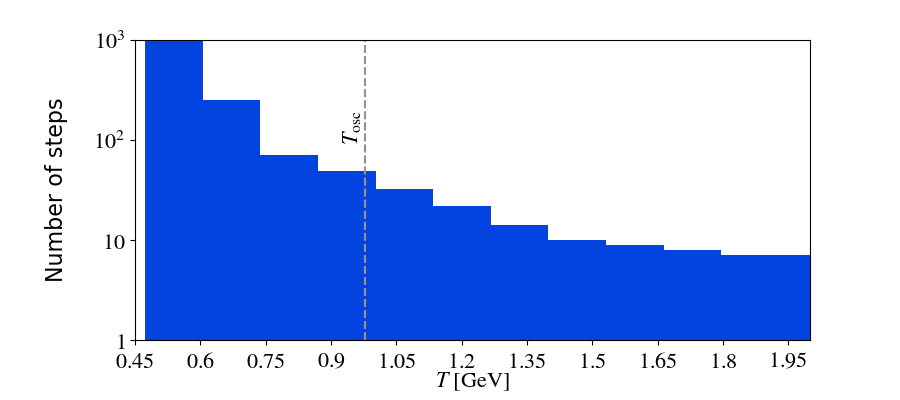

In [13]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    sub.hist(ax.T,bins=30,color='xkcd:blue')
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'Number of steps')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    

    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    

    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    
    
    #set major ticks
    _M_xticks=[ round(0.45+i*0.15,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.45,xmax=2,ymin=1e0,ymax=1e3,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.92,y=1e2, s=r'$T_{\rm osc}$',rotation=90)

#     fig.savefig('histogram.pdf',bbox_inches='tight')

    fig.show()


In [14]:
cosmo=Cosmo('../../src/data/eos2020.dat',0,1.22e19)

<IPython.core.display.Javascript object>


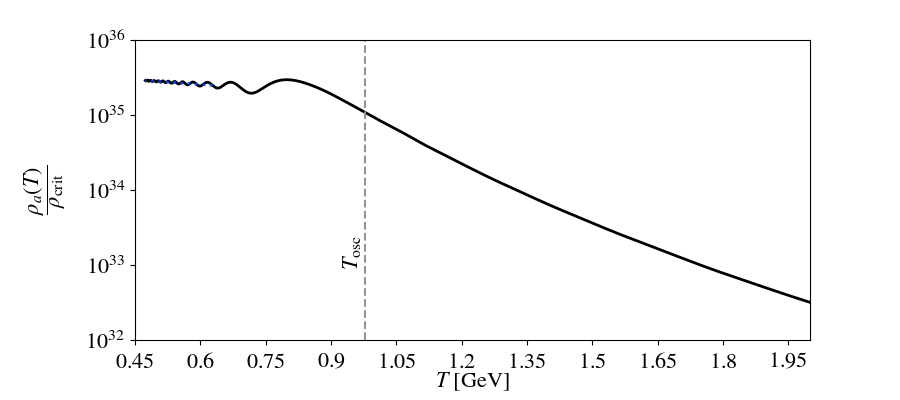

In [15]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    sub.plot(ax.T,ax.rho_axion/cosmo.rho_crit,linestyle='-',linewidth=2,alpha=1,c='xkcd:black')
    sub.plot(ax.T_peak,ax.rho_axion_peak/cosmo.rho_crit,linestyle=':',linewidth=2,alpha=1,c='xkcd:blue')

    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\rho_{a}(T)}{\rho_{\rm crit}}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    sub.axvline(ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    #set major ticks
    _M_xticks=[ round(0.45+i*0.15,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(32,42,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.45,xmax=2,ymin=1e32,ymax=1e36,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.92,y=1e33, s=r'$T_{\rm osc}$',rotation=90)

#     fig.savefig('axion_energy_density.pdf',bbox_inches='tight')


    fig.show()

In [16]:
#run the destructors
del ax
del axionMass
del cosmo